# K-Nearest Neighbors(KNN)


In [ ]:
!pip install tensorflow-gpu

O que é o KNN?

**K-Nearest Neighbors**  "K vizinho mais proximo"  é um algoritimo de aprendizado supervisionado.
Onde utiliza os dados mais proximo para determinar a melhor classificação do novo dado. Para tanto é considerado uma classe de "k" vizinhos. Isso signigica devemos escolher quantos dados proximo iremos levar em conta.

Here's an visualization of the K-Nearest Neighbors algorithm.

![knn.png](knn.png)


Nesse caso , nos temos o grupo A e B .
Se escolhemos K= 3 temos um resultado e k=6 outro, evidenciado a importancia da escolha de k


## Preparando os dados 

### Bibliotecas 

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as skl

In [2]:
import sklearn as skl

### Dados 

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbou

In [15]:
from urllib import request
Name_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv'
file     = 'dataset.csv'

request.urlretrieve(Name_url , file )

('dataset.csv', <http.client.HTTPMessage at 0x1b680a75480>)

In [19]:
df = pd.read_csv(file)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [21]:
df.dtypes

region       int64
tenure       int64
age          int64
marital      int64
address      int64
income     float64
ed           int64
employ       int64
retire     float64
gender       int64
reside       int64
custcat      int64
dtype: object

### Visualição 

In [24]:
df['custcat'].value_counts()
## Estamo verificando qual a contagem para cada grupo 

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Fica melhor com um histograma 

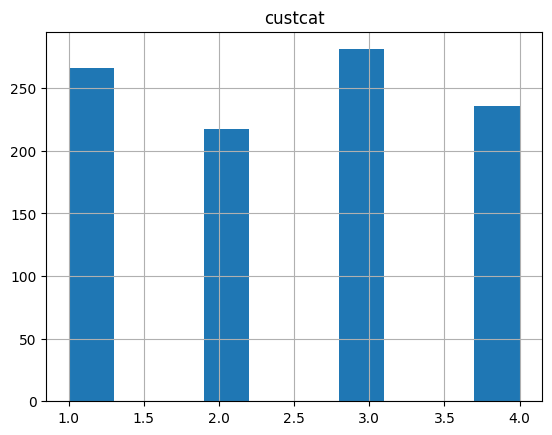

In [28]:
df.hist(column='custcat',bins=10);plt.show()

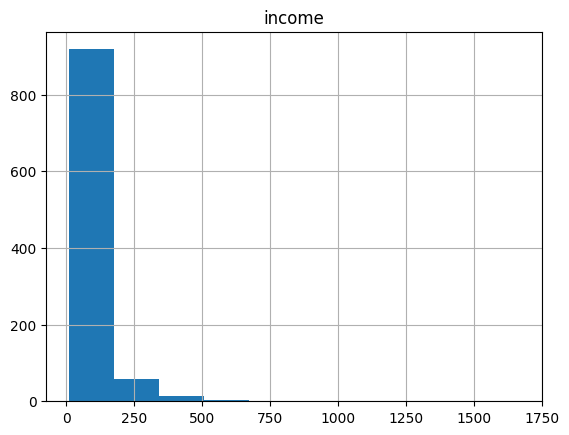

In [26]:
df.hist(column='income',bins=10) # bins(caixas) é a largura da coluna dos histogramas income é renda 
plt.show()

### Vamos separar a parte x e y do dados
x são as caracteristica que usaremops no modelo .

-> ['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed','employ', 'retire', 'gender', 'reside']

y é o grupos que queremos classicar os novos dados .

-> ['custcat']

In [29]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [67]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [58]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

### Normalizando os dados 

Observando os dados em X notamos que  algumas categoreis estão com escalar de range diferente, logo se usamos o KNN que mede distância, notaremos que  algumas feature(caracteristicas) são privilegiadas em relação as outras.
Por isso necessitamo normalizar os dados em um escala padrão, com por exemplo entre 0 e 1 .

In [69]:
df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000


In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

No método "Stand ard Scaler"  é realizado o cálculo de normalização usando :

x_novo =  ( x_antigo - Mean  )/(disvio padrão)

StandardScaler() é um objeto, onde iremos jogar nosso dados em outr palavras: é a função anterior. 

#### 1° 

In [60]:
x = scaler.fit(X)
x

StandardScaler()

In [61]:
x = x.transform(X)
x[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

#### 2° 

Podemos usar a função fit_transform() que farar a mesma coisa  

In [65]:
x = scaler.fit_transform(X.astype(float))
x[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

In [81]:
new_df = pd.DataFrame(x)
new_df.describe()

# Apenas  para visualizar 

,0,1,2,3,4,5,6,7,8,9,10
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.167155e-16,-1.616485e-16,1.989520e-16,-2.664535e-18,-2.664535e-17,4.085621e-17,1.705303e-16,-2.842171e-17,-8.792966e-17,2.131628e-17,2.664535e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.252771e+00,-1.617209e+00,-1.886790e+00,-9.900495e-01,-1.145747e+00,-6.405701e-01,-1.367671e+00,-1.090300e+00,-2.220764e-01,-1.034598e+00,-9.274779e-01
25%,-1.252771e+00,-8.677637e-01,-7.714776e-01,-9.900495e-01,-8.481758e-01,-4.536379e-01,-5.491964e-01,-7.925935e-01,-2.220764e-01,-1.034598e+00,-9.274779e-01
50%,-2.696767e-02,-7.147832e-02,-1.341562e-01,-9.900495e-01,-2.530343e-01,-2.853988e-01,2.692781e-01,-2.964163e-01,-2.220764e-01,9.665588e-01,-2.306500e-01
75%,1.198836e+00,8.653280e-01,7.421608e-01,1.010051e+00,6.396779e-01,5.107924e-02,1.087753e+00,5.967027e-01,-2.220764e-01,9.665588e-01,4.661779e-01
max,1.198836e+00,1.708454e+00,2.813456e+00,1.010051e+00,4.309717e+00,1.486546e+01,1.906227e+00,3.573766e+00,4.502954e+00,9.665588e-01,3.950317e+00


### Separar a parte do treino e teste

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## Classificação 

Chamando o método

In [84]:
from sklearn.neighbors import KNeighborsClassifier

### n=4

In [85]:
neigh = KNeighborsClassifier(n_neighbors = 4)  # Definindo  o modelo com k =4 
neigh

KNeighborsClassifier(n_neighbors=4)

In [87]:
neigh = neigh.fit(X_train,y_train)     # Treinando o modelo 
neigh

KNeighborsClassifier(n_neighbors=4)

Predição

In [88]:
yy = neigh.predict(X_test)
yy[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

#### Verificando a acurácia do teste set 

In [89]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

Train set Accuracy:  0.5475


In [91]:
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yy))

Test set Accuracy:  0.32


### n = 6

In [ ]:
for k in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors = k)  # Definindo  o modelo com k =4 
    neigh = neigh.fit(X_train,y_train)             # Treinando o modelo 
    yy    = neigh.predict(X_test)
    print("For k:",k,"Train set Accuracy: ", metrics.accuracy_score(y_train,neigh.predict(X_train)),"Test set Accuracy: ",metrics.accuracy_score(y_test,yy))